In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import importlib
from os.path import isfile

# import utils file
spec = importlib.util.spec_from_file_location('utils', 'utils.py')
utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils)

Neuron_quality is a csv table of all the neurons we will analyze. 
It also includes some additional neuron types, but we will ignore them.

bodyId is like the social security number of every individual neuron.
neuron_type is the cell type, which is what will will try to predict later

In [11]:
utils.neuron_quality.head()

,bodyId,neuron_type,has_soma,has_axon,has_dendrite
0,1158187240,LC4,True,True,True
1,1158864995,LC4,True,True,True
2,1189559257,LC4,True,True,True
3,1218901359,LC4,True,True,True
4,1249932198,LC4,True,True,True


Here are the neuron types we will use

In [19]:
utils.analyze_neurons

['LC4',
 'LC6',
 'LC9',
 'LC11',
 'LC12',
 'LC13',
 'LC15',
 'LC16',
 'LC17',
 'LC18',
 'LC20',
 'LC21',
 'LC22',
 'LC24',
 'LC25',
 'LC26',
 'LC27',
 'LC29',
 'LC31',
 'LC36']

Here's an example of loading the simple, seven dimensional mitochondria csv file for all the mitochondria in a given section of the neuron

In [20]:
section = 'axon'
all_section_mitos = []
all_labels = []
for i_type, neuron_type in enumerate(utils.analyze_neurons):
    for bodyId in utils.neuron_quality_np[utils.neuron_quality_np[:,1] == neuron_type,0]:
        mito_file = f'segmentations/mito_df/{neuron_type}_{bodyId}_mito_df.csv'
        if isfile(mito_file):
            # this neuron has a saved mitochondria csv file
            mito_df = pd.read_csv(mito_file)
            
            # node_class_dict takes a section as input about outputs the class integer assigned to that section
            is_in_section = mito_df['class'].to_numpy() == utils.node_class_dict[section]
            
            arbor_mito_df = mito_df.iloc[ np.where(is_in_section)[0] ]
            
            all_section_mitos.append(arbor_mito_df.to_numpy()[:,1:])
            all_labels.append( np.ones(len(arbor_mito_df)) * i_type )
all_section_mitos = np.concatenate(all_section_mitos,axis=0)
all_labels = np.concatenate(all_labels,axis=0)

The class represents which neuron section the mitochondrion is in, and the other featuers are the seven morphometrics

In [18]:
mito_df.head()

,class,size,mito SA,mito CA,PC1 Length,PC2 Length,PC3 Length,SBI
0,3.0,1015592.0,139160.328731,2627.0,714.136725,185.850222,89.938141,-0.421732
1,3.0,1017568.0,139610.611478,4434.0,772.371336,114.691397,79.824717,-0.435033
2,3.0,767440.0,71281.069309,17769.0,258.284940,121.094694,83.534749,-0.227823
3,3.0,988160.0,107590.624427,14523.0,270.416084,147.290031,99.819203,-0.371873
4,3.0,615584.0,85222.833207,2117.0,565.358374,89.929948,80.278404,-0.370921


Here's an example loading in the boolean segmented mitochondria for a given section

In [26]:
section = 'axon'
all_section_mitos = []
all_labels = []
for i_type, neuron_type in enumerate(utils.analyze_neurons):
    for bodyId in utils.neuron_quality_np[utils.neuron_quality_np[:,1] == neuron_type,0]:
        mito_file = f'segmentations/mito_df/{neuron_type}_{bodyId}_mito_df.csv'
        if isfile(mito_file):
            # this neuron has a saved mitochondria csv file
            mito_df = pd.read_csv(mito_file)
            
            # node_class_dict takes a section as input about outputs the class integer assigned to that section
            is_in_section = mito_df['class'].to_numpy() == utils.node_class_dict[section]
            if np.any(is_in_section):
                for i_mito in np.where(is_in_section)[0]:
                    file = f'segmentations/mitochondria/{section}/{neuron_type}_{bodyId}_IMito_{i_mito}.pbz2'
                    
                    if isfile(file):
                        # load this mitochondrion
                        mito_subvol = utils.decompress_pickle(file)
                        assert False

AssertionError: 

In [58]:
mito_subvol.shape

(91, 121, 91)

In [36]:
largest_size = utils.get_biggest_size(section)
largest_size

array([ 883,  537, 1117])

In [52]:
padded_mito_subvol = utils.zero_pad_img(mito_subvol, largest_size)

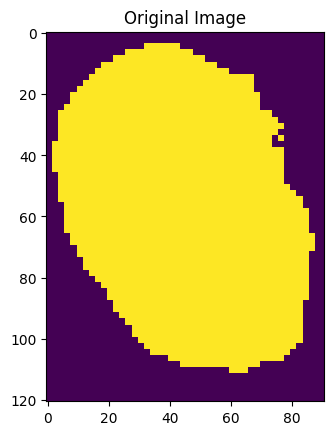

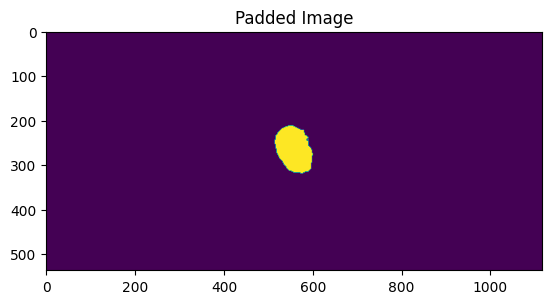

In [56]:
plt.imshow(mito_subvol[int(mito_subvol.shape[0]/2)])
plt.title('Original Image')
plt.show()

plt.imshow(padded_mito_subvol[int(padded_mito_subvol.shape[0]/2)])
plt.title('Padded Image')
plt.show()